In [1]:
import sys
sys.path.insert(0,'..')
from street2sat_utils.client import Prediction, calculate_crop_coords
import matplotlib.pyplot as plt
%matplotlib inline

Fusing layers... 
/Users/izvonkov/nasaharvest/street2sat_website/venv/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 391 layers, 21100857 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 bec19bf torch 1.9.0 CPU



# Generate Predictions

In [2]:
# Setup image paths
img_paths = [f'../example_images/GP__131{i}.JPG' for i in ["2", "3", "4"]]

In [3]:
# Generate predictions for each image path
# Initializing a prediction will call the underlying yolovv5 model and synthesize the results
preds = [Prediction.from_img_path(p) for p in img_paths]

# Analyze Predictions

In [4]:
preds[0]


Image:
    Time:     2020-12-16 08:42:54
    Coord:    (0.6752619999999999, 34.7491525)
    
Predicted distances:
    {'sugarcane': 20.397414224803118}
        

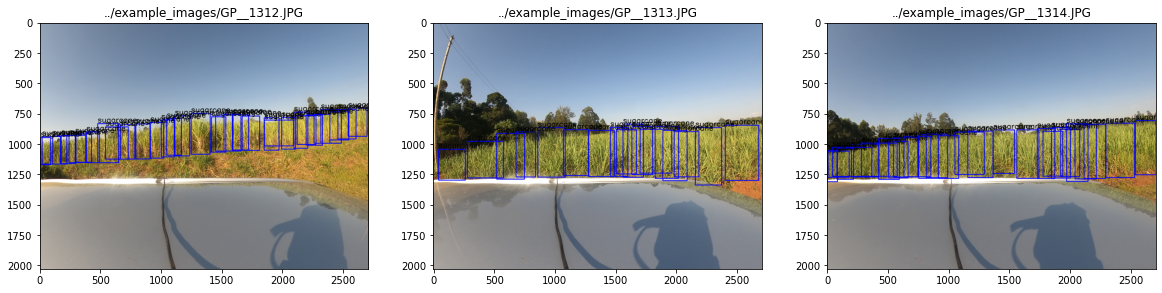

In [6]:
# Display yolov5 predictions
fig, ax = plt.subplots(1, len(preds), figsize=(20,20))
for i, p in enumerate(preds):
    ax[i].title.set_text(p.name)
    ax[i].imshow(p.plot_labels())

# Get bearing and crop coordinate estimations

In [8]:
# This function uses the nearest predictions to generate a bearing and crop coordinate estimate
preds = calculate_crop_coords(preds)

In [9]:
[p.crop_coord for p in preds]

[{'sugarcane': (0.6752591873315441, 34.748969274711484)},
 {'sugarcane': (0.6805255576596102, 34.748944676649)},
 {'sugarcane': (0.6807243040599843, 34.74894115130783)}]